# Data Driven Dealings Development

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
data = pd.read_excel('/content/gdrive/My Drive/DDDD_folder/DDDD.xlsx')
data.head()

,SalesDate,SalesValue,SalesAmount,Customer,SalesTransactionID,SalesItem
0,2018-09-28,8280.0,10,0,0,0
1,2018-09-28,7452.0,10,0,0,0
2,2019-04-23,21114.0,30,0,1,0
3,2019-04-23,7038.0,10,0,1,1
4,2019-04-23,7000.0,2,0,1,2


In [3]:
df1 = data[['Customer','SalesTransactionID','SalesItem']]
df1.head()

,Customer,SalesTransactionID,SalesItem
0,0,0,0
1,0,0,0
2,0,1,0
3,0,1,1
4,0,1,2


In [4]:
df=df1.groupby ('SalesTransactionID') ['SalesItem']. apply (lambda x: x.reset_index (drop = True)). unstack (). reset_index ()
df.drop('SalesTransactionID',axis=1, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,436,437,438,439,440,441,442,443,444,445
0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
items = (df[0].unique())
items

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 9.060e+02, 1.536e+03,
       3.750e+03])

In [6]:
encoded_vals = []
def custom():
    for index, row in df.iterrows():
        labels = {}
        uncommons = list(set(items) - set(row))
        commons = list(set(items).intersection(row))
        for uc in uncommons:
            labels[uc] = 0
        for com in commons:
            labels[com] = 1
        encoded_vals.append(labels)
custom()
ohe_df = pd.DataFrame(encoded_vals)
print(ohe_df)

       1.0     2.0     3.0     4.0     5.0     6.0     7.0     8.0     9.0     \
0           0       0       0       0       0       0       0       0       0   
1           1       1       0       0       0       0       0       0       0   
2           1       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
48421       0       0       0       0       0       0       0       0       0   
48422       0       0       0       0       0       0       0       0       0   
48423       0       0       0       0       0       0       0       0       0   
48424       0       0       0       0       0       0       0       0       0   
48425       0       0       0       0       0       0       0       0       0   

       10.0    ...  3736.0 

In [7]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [9]:
freq_items = apriori(ohe_df, min_support=0.006, use_colnames=True) #, verbose=1 #min_support=0.006, 
freq_items

,support,itemsets
0,0.006732,(6.0)
1,0.021270,(7.0)
2,0.024326,(8.0)
3,0.021600,(9.0)
4,0.018812,(13.0)
...,...,...
1044,0.006174,"(312.0, 98.0, 104.0, 103.0)"
1045,0.007228,"(312.0, 98.0, 108.0, 103.0)"
1046,0.006422,"(312.0, 108.0, 98.0, 104.0)"
1047,0.006463,"(104.0, 108.0, 110.0, 103.0)"


In [10]:
freq_items.to_excel('Export&Supportvalues.xlsx')

In [11]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.006)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(8.0),(7.0),0.024326,0.021270,0.008095,0.332767,15.645237,0.007577,1.466850
1,(7.0),(8.0),0.021270,0.024326,0.008095,0.380583,15.645237,0.007577,1.575148
2,(20.0),(7.0),0.058584,0.021270,0.007062,0.120550,5.667717,0.005816,1.112889
3,(7.0),(20.0),0.021270,0.058584,0.007062,0.332039,5.667717,0.005816,1.409387
4,(83.0),(7.0),0.040784,0.021270,0.006422,0.157468,7.403459,0.005555,1.161654
...,...,...,...,...,...,...,...,...,...
2569,"(104.0, 103.0)","(312.0, 108.0)",0.018275,0.012597,0.006257,0.342373,27.179917,0.006027,1.501464
2570,(312.0),"(104.0, 108.0, 103.0)",0.021951,0.010346,0.006257,0.285042,27.551816,0.006030,1.384214
2571,(108.0),"(312.0, 104.0, 103.0)",0.034176,0.007124,0.006257,0.183082,25.698285,0.006013,1.215392
2572,(104.0),"(312.0, 108.0, 103.0)",0.049911,0.009107,0.006257,0.125362,13.765944,0.005802,1.132918


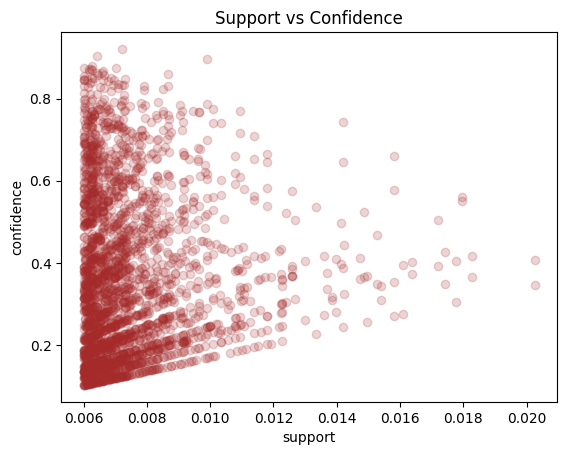

In [12]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'], alpha=0.2,color='brown')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

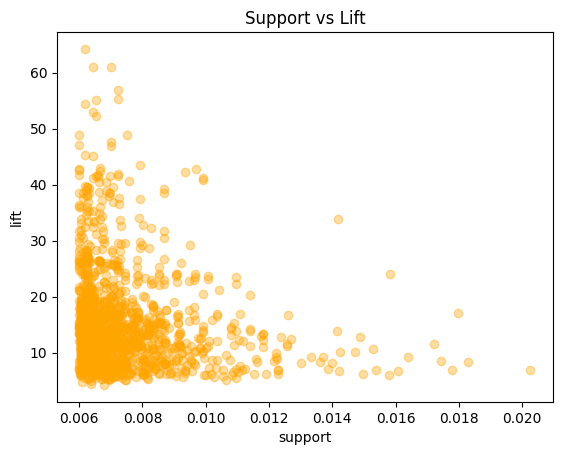

In [13]:
plt.scatter(rules['support'], rules['lift'], alpha=0.2,color='orange')
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

Market Basket Analysis

In [16]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 18.1 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=2af5c77e2fd9b38a7347d2e0defc53e1e085e59f73aad71f17aa413b117aa746
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [17]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName('fpgrowth') \
    .getOrCreate()

spark   

In [18]:
from google.colab import files
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas


sparkdata = spark.createDataFrame(data)
basketdata = sparkdata.dropDuplicates(['SalesTransactionID', 'SalesItem']).sort('SalesTransactionID')
basketdata = basketdata.groupBy("SalesTransactionID").agg(F.collect_list("SalesItem")).sort('SalesTransactionID')

In [19]:
#Frequent Pattern Growth – FP Growth is a method of mining frequent itemsets
fpGrowth = FPGrowth(itemsCol="collect_list(SalesItem)", minSupport=0.006, minConfidence=0.006) 
model = fpGrowth.fit(basketdata)

# Display frequent itemsets.
model.freqItemsets.show()
items = model.freqItemsets
# Display generated association rules.
model.associationRules.show()
rules = model.associationRules
# transform examines the input items against all the association rules and summarize the
# consequents as prediction
model.transform(basketdata).show()
transformed = model.transform(basketdata)

+----------+----+
|     items|freq|
+----------+----+
|     [315]| 553|
|     [274]| 407|
|     [137]| 730|
|    [1491]| 432|
|     [295]| 471|
|     [565]| 368|
|     [363]| 512|
|     [159]| 671|
|[159, 161]| 319|
| [159, 20]| 296|
|     [131]| 599|
|[131, 132]| 364|
|      [19]| 382|
|     [135]| 690|
|     [302]| 622|
|      [22]| 449|
|     [205]| 484|
|     [152]| 761|
|     [146]| 524|
|     [128]| 929|
+----------+----+
only showing top 20 rows

+----------+----------+-------------------+------------------+--------------------+
|antecedent|consequent|         confidence|              lift|             support|
+----------+----------+-------------------+------------------+--------------------+
|     [132]|     [131]|  0.603648424543947| 48.80180067940764|0.007516623301532235|
| [63, 104]|      [20]| 0.7111650485436893|12.139188805349558|0.006050468756453145|
|     [285]|     [102]| 0.5182291666666666|28.713690646453088|0.008218725478048982|
|     [285]|     [514]| 0.399739583333

In [20]:
# Convert the Spark DataFrame back to a Pandas DataFrame using Arrow
result_pdf = items.select("*").toPandas()
result_pdf.head()

,items,freq
0,[315],553
1,[274],407
2,[137],730
3,[1491],432
4,[295],471


In [21]:
result_pdf.to_excel('result_pdfItemsFreq.xlsx')

In [22]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

,antecedent,consequent,confidence,lift,support
0,[132],[131],0.603648,48.801801,0.007517
1,"[63, 104]",[20],0.711165,12.139189,0.006050
2,[285],[102],0.518229,28.713691,0.008219
3,[285],[514],0.399740,13.777786,0.006340
4,[285],[83],0.470052,11.525439,0.007455


In [23]:
rules_pdf.to_excel('rules_pdfAnteConseConfLift.xlsx')

In [24]:
transformed_pdf = transformed.select("*").toPandas()
transformed_pdf.head()

,SalesTransactionID,collect_list(SalesItem),prediction
0,0,[0],[]
1,1,"[0, 1, 2]",[]
2,2,[1],[]
3,3,[0],[]
4,4,[0],[]


In [25]:
transformed_pdf.to_excel('transformed_pdfSalesTransactionIDCollectListPred.xlsx')